# XGBoost(eXtra Gradient Boost)

부스팅(Boosting) 

- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서
- 잘못 예측된 데이터에 **가중치(weight) 부여**를 통해
    - 경사하강법 사용(회귀알고리즘 기법)
- 오류를 개선해 나가면서 학습하는 방식
    

대표적인 부스팅 알고리즘 
- GBM
- AdaBoost
- xgboost
- ligt_gbm

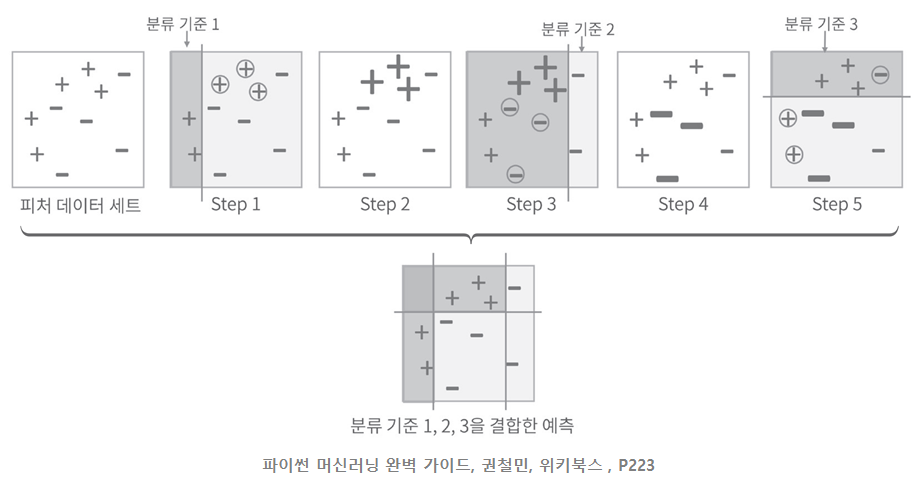

### 경사하강법 프로세스

In [1]:
## 비용함수
def cost(data, target, weight, intercept) : # MSE 구하기
    y_pre = pre(weight, data, intercept) # 예측값
    
    return((y_pre - target)**2).mean()

In [2]:
# 예측함수
def pre(w,x,b) :
    return w*x+b

In [7]:
# data 
import pandas as pd
data_test = pd.DataFrame([[9, 90], [8,80],[5,50],[2,20]], columns=['시간','성적'])
data_test = pd.DataFrame({'시간':[9,8,4,2],'성적':[90,80,50,20]})
data_test                         
                                                   

,시간,성적
0,9,90
1,8,80
2,4,50
3,2,20


In [8]:
weight_arr = range(-10, 31) # 가중치로 활용
cost_li = []

In [11]:
for w in weight_arr : 
    c = cost(data_test['시간'], data_test['성적'], w,0)
    cost_li.append(c)

In [14]:
weight_arr

range(-10, 31)

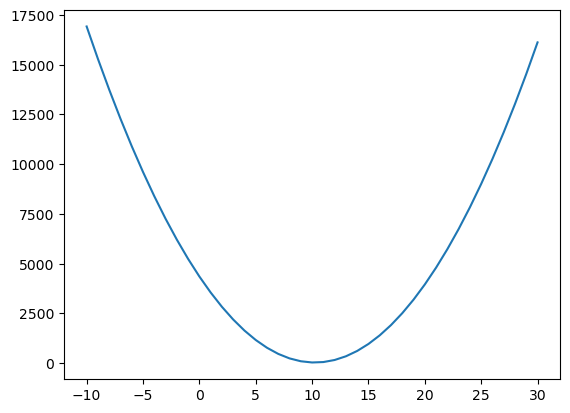

In [12]:
import matplotlib.pyplot as plt

plt.plot(weight_arr, cost_li)

In [13]:
from sklearn.linear_model import SGDRegressor

In [17]:
sgd_model = SGDRegressor(max_iter=100, 
                        eta0=0.05,
                        verbose=1) # 가중치 업데이트시 진행된 프로세스의 결과값 출력

In [20]:
sgd_model.fit(data_test[['시간']],data_test[['성적']])

-- Epoch 1
Norm: 0.89, NNZs: 1, Bias: 3.440479, T: 4, Avg. loss: 4389.535521
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.23, NNZs: 1, Bias: 4.860623, T: 8, Avg. loss: 520.687245
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7.51, NNZs: 1, Bias: 5.372122, T: 12, Avg. loss: 549.345299
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.33, NNZs: 1, Bias: 5.774730, T: 16, Avg. loss: 58.963201
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.00, NNZs: 1, Bias: 5.862737, T: 20, Avg. loss: 16.845231
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.81, NNZs: 1, Bias: 5.821328, T: 24, Avg. loss: 15.653915
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.07, NNZs: 1, Bias: 5.825171, T: 28, Avg. loss: 9.509315
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.85, NNZs: 1, Bias: 5.770001, T: 32, Avg. loss: 18.401783
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.70, NNZs: 1, Bias: 5.744865, T: 36, Avg. loss: 12.823380
Total training time: 0.00 seconds

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.05, max_iter=100, verbose=1)

In [24]:
print('W : ' , sgd_model.coef_)
print('I : ', sgd_model.intercept_)

W :  [9.60224639]
I :  [5.57756417]


In [25]:
sgd_model.predict([[7]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([72.79328888])

### 학습률과 반복횟수 구성
- 학습률을 조금씩 키워가면서 먼저 적당한 값을 찾는다
    - 위 예제에서는 eta0 파라미터 튜닝시 [0.051, 0.052]
- 학습률을 결정했으면 반복횟수를 튜닝
    - 100부터 시작하는것이 일반적
- 과대적합에 들어갔는지
    - 최소점을 지나가버렸던가 아니면 지역 최소점에서 빠져 나오지 못하면 손실값이 커진 상태로 반복되게 됨
        - 지나치게 손실값이 커지면 과대/과소 적합을 생각해야 함

## XGBoost 개요
- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
- 압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄
- GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결
- 특히 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습 완료

#### XGBoost 장점
- 뛰어난 예측 성능
- 빠른 수행 시간
- 과적합 규제 
- 가지치기 (pruning) - 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 줄이게 됨
    - max_depth 파라미터로 가지치기 조정
- 교차 검증 내장
- 결손값 자체 처리


## XGBoost 라이브러리 -XGBoost 파이썬 구현

(1) XGBoost는 처음에는 C/C++로 작성되었음

(2) 파이썬에서도 XGBoost를 구동할 수 있도록 파이썬 패키지(xgboost) 제공
* 패키지 역할 : 대부분 C/C++ 핵심 라이브러리를 호출하는 것
* 사이킷런과 호환되지 않는 독자적인 XGBoost 전용 패키지
* 따라서 사이킷런의 fit(), predict() 메서드 같은 사이킷런 고유 아키텍처 적용 불가
* 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등)도 사용 불가
* '파이썬 래퍼 XGBoost 모듈'로 지칭

(3) 파이썬 기반의 ML 이용자들이 사이킷런을 많이 사용하기 때문에  
사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class) 제공
* XGBClassifer와 XGBRegressor 래퍼 클래스
*  사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict() 등 
*  표준 사이킷런 개발 프로세스 및 다양한 유틸리티 활용 가능
* '사이킷런 래퍼 XGBoost 모듈'로 지칭

**'파이썬 래퍼 XGBoost 모듈'과 '사이킷런 래퍼 XGBoost 모듈' 차이점**
- '사이킷런 래퍼 XGBoost 모듈' : 사이킷런의 Estimator와 사용법 동일
- '파이썬 래퍼 XGBoost 모듈' : 파이썬 네이티브 XGBoost 고유의 API와 하이퍼 파라미터 이용
- 크게 다르지는 않지만 몇 가지 주의할 점이 있음
- 파이썬 Wrapper : 사이킷런 Wrapper
    - eta : learning_rate  (학습률)
    - num_boost_rounds : n_estimators  (학습기의 개수 : 반복 수행 횟수)    

In [26]:
!pip install xgboost

# 위스콘신 유방암 예측 예제  
(1) 사이킷런 Wrapper XGBoost 적용

- 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 세트
- 양성 : 제거하여 치유할 수 있는 종양. 성장속도 느리고 전이되지 않음
- 악성 : 암. 빠르게 성장하고 전이되어 생명 위협

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [28]:
# 데이터 세트 로딩
dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

In [31]:
# 데이터 확인하기 위해 데이터 프레임으로 생성
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label # 맨 마지막에 target 열 추가
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [32]:
# 레이블 값 분포 확인
cancer_df['target'].value_counts()
# target : 0 악성, 1 양성

target
1    357
0    212
Name: count, dtype: int64

In [36]:
# 학습 데이터/테스트 데이터 분리 9:1 - train/val/test를 사용
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)

(512, 30) (57, 30)


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))

## (1) 사이킷런 Wrapper XGBoost 개요 및 적용

- 사이킷런의 기본 Estimator를 그대로 상속해서 만들었기 때문에  
- fit()과 predict()만으로 학습과 예측 가능  

- 하이퍼 파라미터
    - 사이킷런 Wrapper  
        - learning_rate (학습률)  
        - n_estimators (학습기의 개수 : 반복 수행 횟수)  

- 분류를 위한 XGBClassifier 클래스
- 회귀를 위한 XGBRegressor 클래스


- 파이썬 래퍼 XGBoost에서 사용하는 하이퍼파라미터와 호환성을 유지하기 위해 몇개 하이퍼파라미터를 변경
    - eta  → learning_rate
    - sub_sample → subsample
    - lambda → reg_lambda
    - alpha → reg_alpha
    
    
- xgboost의 n_estimators와 num_boost_round는 동일한 파라미터
    - 이를 동시에 사용할 경우 
        - 파이썬 래퍼 XGBoost API는 n_estimator를 무시하고 num_boost_round를 적용
        - 사이킷런 래퍼 XGBoost는 n_estimator 파라미터를 적용

In [35]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

### XGBoost 데이터
- 한번의 학습 진행 후 손실계산을 함
    - 데이터는 train/val/test로 분할을 하는 것이 원칙
        - 학습데이터가 줄어드는 현상이 일어남
            - 과속적합되면서 성능이 떨어질 수 있음
        - 충분한 양의 데이터를 사용해야 함

In [37]:
# 학습 데이터/val 데이터 분리 9:1
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train,
                                         test_size=0.1, random_state=156 )
print(X_train.shape , X_val.shape)

(460, 30) (52, 30)


In [24]:
# 교재 주의사항 : 검증 데이터 세트를 따로 생성해서 검증을 진행 해야 함
# - 예제 데이터의 양이 검증용 데이터를 추출하기에 너무 적어 test용 데이터를 검증용과 테스트용으로 사용
# - 실제 분석에서는 이렇게 진행하면 안됨
# - 데이터가 적어도 val 생성 후 진행

In [38]:
from xgboost import XGBClassifier  # 사잇킷런 래퍼 클래스

In [39]:
# 모델 객체 인스턴스 생성
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_dept=3)

### XGBoost 학습 파라미터
- eval_set : 검증데이터 세트
- eval_metric : 검증함수(손실함수,비용함수)
- verbose : 각 반복별 손실결과 출력여부
- early_stopping_rounds : 손실값의 증가시 조기종료 조건
    - 손실값의 변화가 없을때(증가가 감지되었을 때) early_stopping_rounds로 설정되어 있는 수치만큼  더 돌려보고 그래도 감소되지 않으면 종료를 하게됨

In [40]:
evals = [(X_val, y_val)] # 검증데이터
# 학습과 예측 수행 : fit(), predict(), predict_proba() 이용
# fit()에서 early_stopping_rounds설정, eval_metric도 설정
xgb_wrapper.fit(X_train, y_train, eval_set=evals, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.61378
[1]	validation_0-logloss:0.55951
[2]	validation_0-logloss:0.51403
[3]	validation_0-logloss:0.47878
[4]	validation_0-logloss:0.44697
[5]	validation_0-logloss:0.42140
[6]	validation_0-logloss:0.40036
[7]	validation_0-logloss:0.38306
[8]	validation_0-logloss:0.36933
[9]	validation_0-logloss:0.35688
[10]	validation_0-logloss:0.34703
[11]	validation_0-logloss:0.33611
[12]	validation_0-logloss:0.32965
[13]	validation_0-logloss:0.32614
[14]	validation_0-logloss:0.31740
[15]	validation_0-logloss:0.30996
[16]	validation_0-logloss:0.30104
[17]	validation_0-logloss:0.29978
[18]	validation_0-logloss:0.29259
[19]	validation_0-logloss:0.28864
[20]	validation_0-logloss:0.28286
[21]	validation_0-logloss:0.28128
[22]	validation_0-logloss:0.27744
[23]	validation_0-logloss:0.27505
[24]	validation_0-logloss:0.27267
[25]	validation_0-logloss:0.26978
[26]	validation_0-logloss:0.27161
[27]	validation_0-logloss:0.27038
[28]	validation_0-logloss:0.27088
[29]	validation_0-loglos

[238]	validation_0-logloss:0.33491
[239]	validation_0-logloss:0.33532
[240]	validation_0-logloss:0.33535
[241]	validation_0-logloss:0.33533
[242]	validation_0-logloss:0.33536
[243]	validation_0-logloss:0.33577
[244]	validation_0-logloss:0.33507
[245]	validation_0-logloss:0.33543
[246]	validation_0-logloss:0.33573
[247]	validation_0-logloss:0.33609
[248]	validation_0-logloss:0.33612
[249]	validation_0-logloss:0.33649
[250]	validation_0-logloss:0.33651
[251]	validation_0-logloss:0.33692
[252]	validation_0-logloss:0.33619
[253]	validation_0-logloss:0.33617
[254]	validation_0-logloss:0.33652
[255]	validation_0-logloss:0.33583
[256]	validation_0-logloss:0.33623
[257]	validation_0-logloss:0.33626
[258]	validation_0-logloss:0.33655
[259]	validation_0-logloss:0.33691
[260]	validation_0-logloss:0.33693
[261]	validation_0-logloss:0.33732
[262]	validation_0-logloss:0.33664
[263]	validation_0-logloss:0.33663
[264]	validation_0-logloss:0.33697
[265]	validation_0-logloss:0.33625
[266]	validation_0-l

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dept=3, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

- 설정된 반복 횟수(n_estimators)에 대하여 모든 반복
    - 반복에 대한 손실함수 결과는 감소하다가 다시 증가 : 과적합이 보임

In [41]:
# 예측
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [42]:
# 예측 성능 평가 수행
get_clf_eval(y_test, w_preds, w_pred_proba ) # 현재 함수에서는 w_pred_proba는 사용하지 않음

오차 행렬
[[15  3]
 [ 1 38]]
정확도: 0.9298, 정밀도: 0.9268, 재현율: 0.9744,    F1: 0.9500


In [43]:
# early stopping 설정
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_dept=3)
xgb_wrapper.fit(X_train, y_train, eval_set=evals, eval_metric="logloss",
                early_stopping_rounds=100,
                verbose=True)

[0]	validation_0-logloss:0.61378
[1]	validation_0-logloss:0.55951
[2]	validation_0-logloss:0.51403
[3]	validation_0-logloss:0.47878
[4]	validation_0-logloss:0.44697
[5]	validation_0-logloss:0.42140
[6]	validation_0-logloss:0.40036
[7]	validation_0-logloss:0.38306
[8]	validation_0-logloss:0.36933
[9]	validation_0-logloss:0.35688
[10]	validation_0-logloss:0.34703
[11]	validation_0-logloss:0.33611
[12]	validation_0-logloss:0.32965
[13]	validation_0-logloss:0.32614
[14]	validation_0-logloss:0.31740
[15]	validation_0-logloss:0.30996
[16]	validation_0-logloss:0.30104
[17]	validation_0-logloss:0.29978
[18]	validation_0-logloss:0.29259
[19]	validation_0-logloss:0.28864
[20]	validation_0-logloss:0.28286
[21]	validation_0-logloss:0.28128
[22]	validation_0-logloss:0.27744
[23]	validation_0-logloss:0.27505
[24]	validation_0-logloss:0.27267
[25]	validation_0-logloss:0.26978
[26]	validation_0-logloss:0.27161
[27]	validation_0-logloss:0.27038
[28]	validation_0-logloss:0.27088
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dept=3, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

- 130 턴에서 조기종료
    - 30턴 이후 조기종료에 해당하는 패턴을 감지했다

In [44]:
w100_preds = xgb_wrapper.predict(X_test)

In [45]:
# 예측 성능 평가
get_clf_eval(y_test, w100_preds, 10)  # 예측 확률은 함수에서 사용되지 않으므로 임의의값 전달

오차 행렬
[[15  3]
 [ 1 38]]
정확도: 0.9298, 정밀도: 0.9268, 재현율: 0.9744,    F1: 0.9500


In [ ]:
정확도: 0.9298, 정밀도: 0.9268, 재현율: 0.9744,    F1: 0.9500

### 데이터 양이 xgboost에 진행하기에는 너무 작음
- 조기종료가 효과가 없음
- 데이터 양이 충분하다면 조기종료는 일반화 진행으로 성능을 높이게 됨

In [47]:
# 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

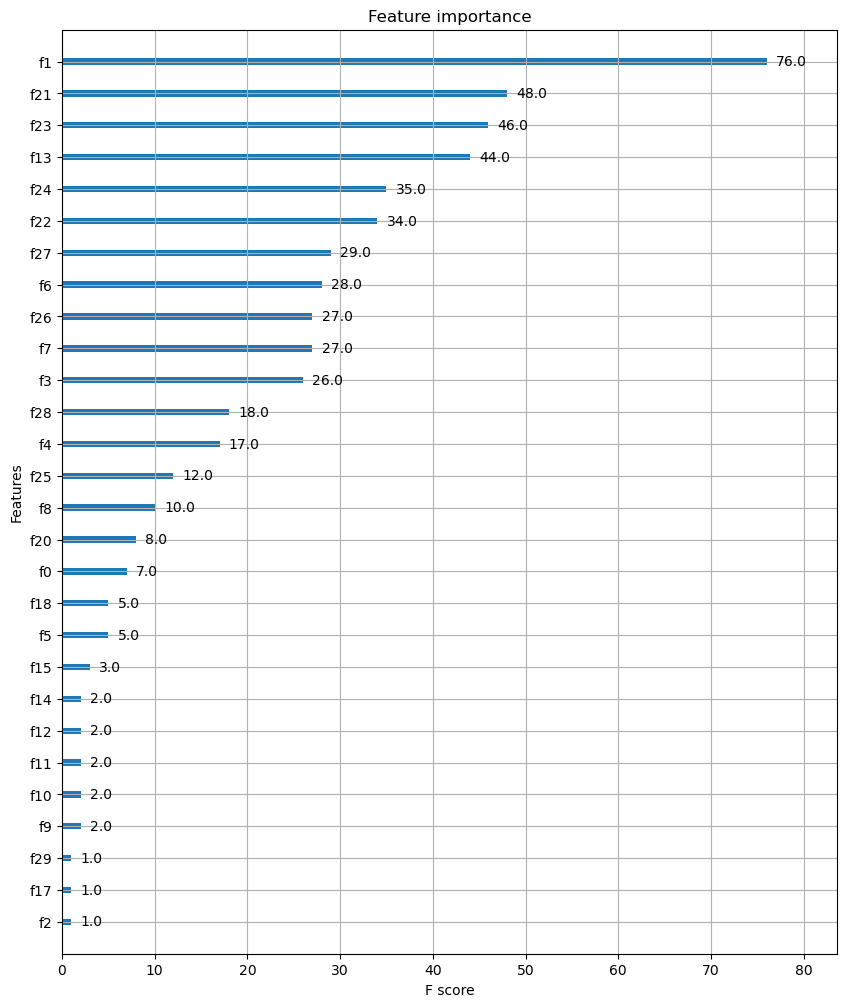

In [49]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax) # ax는 그래프 영역 객체